<a href="https://colab.research.google.com/github/vivekMishra121/AirBnb_Booking_AnalysisEDA/blob/main/AirBnb_BookingAnalysisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
airbnb = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
airbnb.shape[0]
print('there are',airbnb.shape[0],'Rows and',airbnb.shape[1],'Columns in our Dataset')

there are 48895 Rows and 16 Columns in our Dataset


### Dataset Information

In [6]:
# Dataset Info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(airbnb[airbnb.duplicated()])

0

There are no duplicate values in our dataset

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
airbnb.isna().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

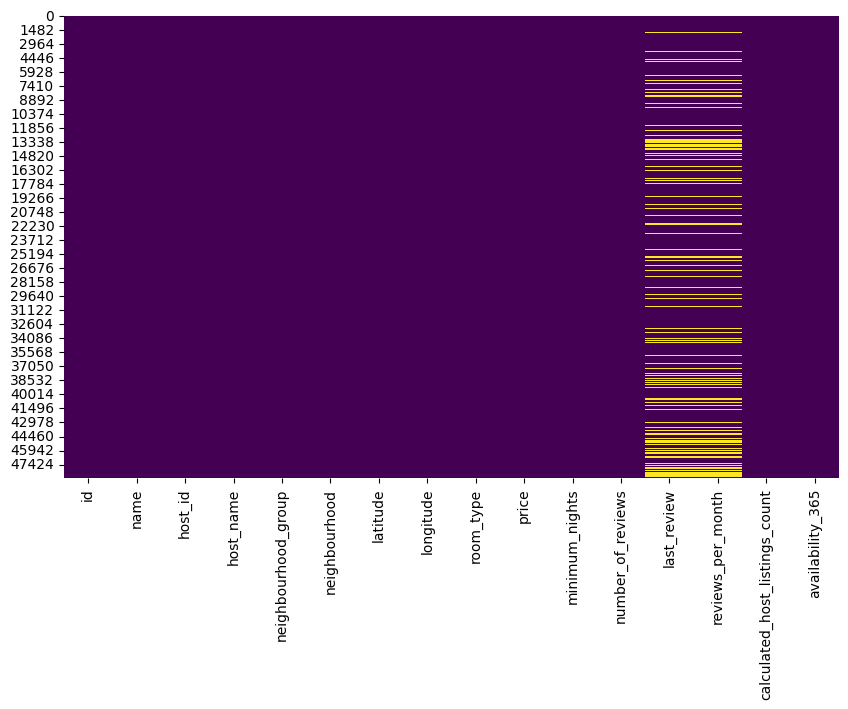

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(airbnb.isnull(),cmap='viridis', cbar=False)

Here we can clearly see that in columns `last_review` and `reviews_per_month` has maximum null values that will be removed later by appropriate methods

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
for column in airbnb.columns:
  print(column)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [11]:
# Dataset Describe
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# creating a copy of our datasets for furthur analysis
df = airbnb.copy()

In [14]:
# Write your code to make your dataset analysis ready.
# First we clean our data by handling nan values of below columns
nan_values = df.isna().sum().sort_values(ascending = False)
nan_values[:4]

last_review          10052
reviews_per_month    10052
host_name               21
name                    16
dtype: int64

In [15]:
# lets check for % of null values in above four columns,starting with last review
# total unique number of rows are in our dataset
unique_no_of_rows = df.shape[0] ,#unique no of rows are = 48895
last_review_perentage_null_values = nan_values[0]/unique_no_of_rows*100
print(last_review_perentage_null_values)

[20.5583393]


In [16]:
# 20% of last_review column is null so here we will fill values by forword fill method
df['last_review'].fillna(method='ffill', inplace=True)

In [17]:
# since in reviews_per_month column have equal no of null values as last_review column

# so this column also have 20% null values and since its a float data type hence we will impute mean value method to fill na values

df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace= True)

In [18]:
# now in host_name and name column have very less null values (21 and 16 respectively).
# so we will drop those rows containing null values
df.dropna(subset=['host_name','name'], inplace=True)

In [19]:
# lets check the Null values count in each column in dataset
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now there is no Null values in our dataset

In [20]:
# now we will rename neighbouring_group and meighbourhood column for bettter understandinng
df.rename(columns={'neighbourhood_group':'location','neighbourhood':'area'},inplace = True)

 here we can see that `last_review` column has only dates so changing its data type from object to Date time data type

In [21]:
df['last_review'] = pd.to_datetime(df['last_review'])



##  Lets Check for outliers in dataset



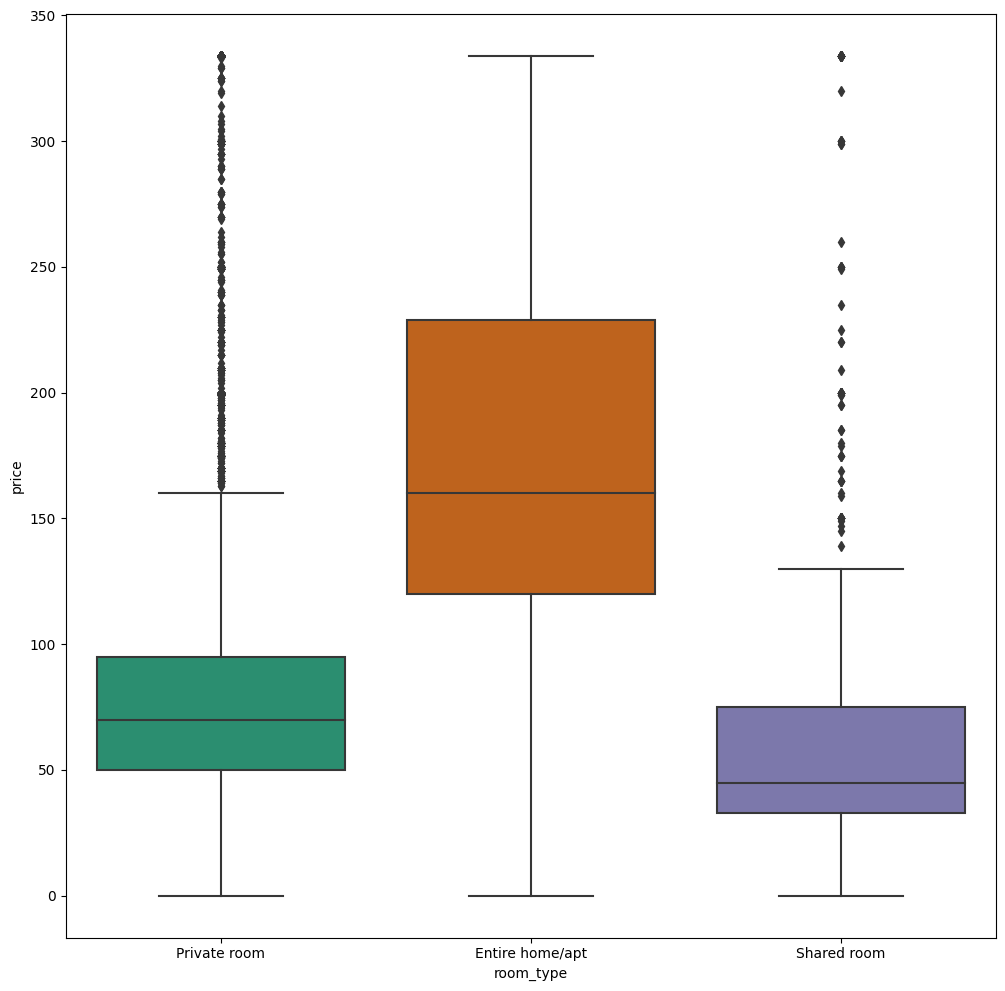

In [61]:
# Lets check for outliers in price of various room types
sns.boxplot(x=df['room_type'],y=df['price'])
plt.show()

There is lot of outliers  present in `Price` column of Private rooms and shared room, hence we have to remove it by one by one by IQR methods

In [62]:
private = df[df['room_type']=='Private room']
shared =df[df['room_type']=='Shared room']

# Handling Outlier Using IQR method , start with private rooms dataframe
Q1 = private['price'].quantile(0.25)
Q3 = private['price'].quantile(0.75)

# Inter Quartile Range
IQR = Q3 - Q1

#upper_limit and lower_limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [69]:
# Handle and fixed the outlier by using IQR and capping method

private['price'] = np.where(private['price'] > upper_limit, upper_limit,
                     np.where(private['price'] < lower_limit, lower_limit, private['price']))


<ipython-input-69-d91457ff7cab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private['price'] = np.where(private['price'] > upper_limit, upper_limit,


In [64]:
# Handling Outlier Using IQR method , start with shared rooms dataframe
Q1 = shared['price'].quantile(0.25)
Q3 = shared['price'].quantile(0.75)

# Inter Quartile Range
IQR = Q3 - Q1

#upper_limit and lower_limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [65]:
# Handle and fixed the outlier by using IQR and capping method

shared['price'] = np.where(shared['price'] > upper_limit, upper_limit,
                     np.where(shared['price'] < lower_limit, lower_limit, shared['price']))


<ipython-input-65-ae2b93d9e647>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared['price'] = np.where(shared['price'] > upper_limit, upper_limit,


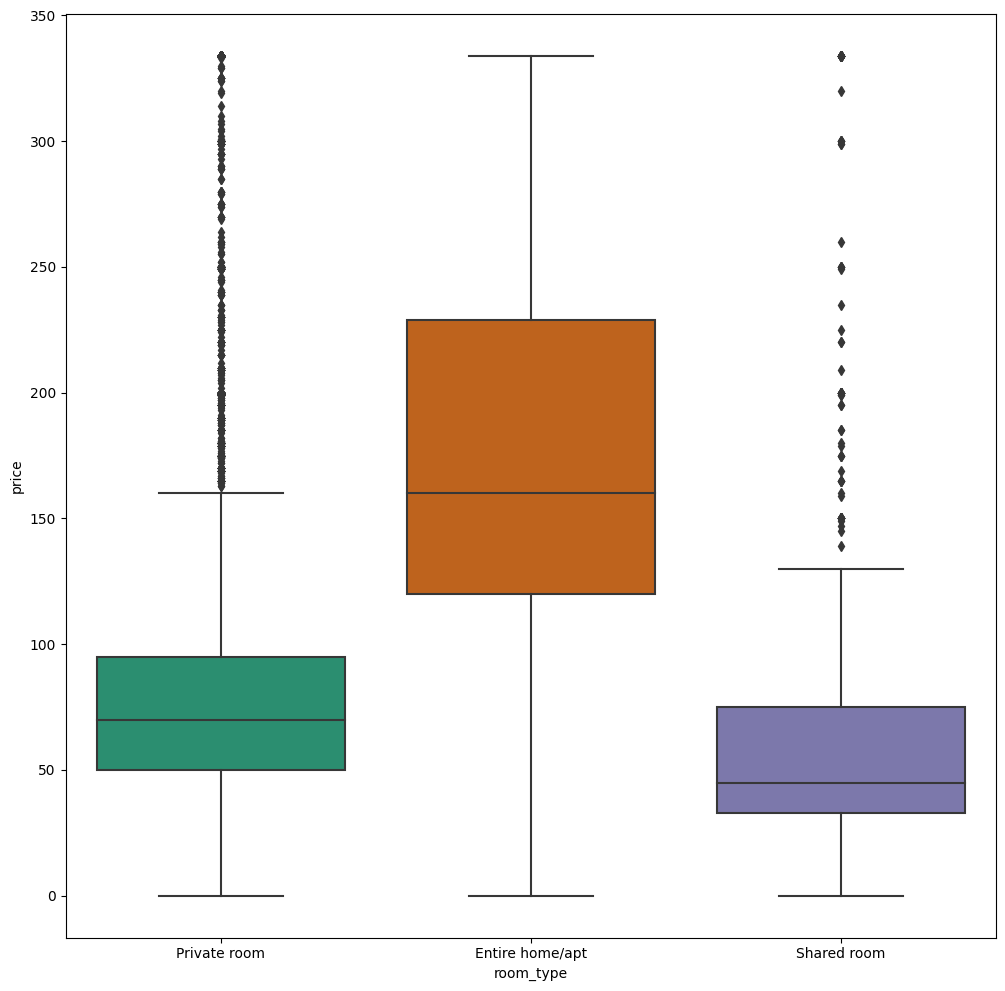

In [66]:
sns.boxplot(x=df['room_type'],y=df['price'])
plt.show()


,id,name,host_id,host_name,location,area,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2019-05-21,1.373221,1,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.400000,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.470000,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.990000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125.0,4,0,2019-07-08,1.373221,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65.0,1,0,2019-07-08,1.373221,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2019-07-08,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2019-07-08,1.373221,2,36






#      Data Manipulation





## price comparisons by location and room type

In [22]:

# Calculate the average price by location and room type
average_prices = df.groupby(['location', 'room_type'])['price'].mean().unstack()
# Calculate the maximum price by location and room type
max_prices = df.groupby(['location', 'room_type'])['price'].max().unstack()

# Display the summary statistics
print("Average Prices:")
print(average_prices)
print("\nMaximum Prices:")
print(max_prices)

Average Prices:
room_type      Entire home/apt  Private room  Shared room
location                                                 
Bronx               127.645503     66.788344    58.610169
Brooklyn            178.362609     76.510619    50.527845
Manhattan           249.238211    116.805594    88.977083
Queens              147.050573     71.776855    69.020202
Staten Island       173.846591     62.292553    57.444444

Maximum Prices:
room_type      Entire home/apt  Private room  Shared room
location                                                 
Bronx                     1000          2500          800
Brooklyn                 10000          7500          725
Manhattan                10000          9999         1000
Queens                    2600         10000         1800
Staten Island             5000           300          150


##Which host have provided highest number of listings at AirBnb(Top 5)

In [23]:
df.groupby('host_name')['calculated_host_listings_count'].sum().reset_index().sort_values(by = 'calculated_host_listings_count',ascending = False).head(5)

,host_name,calculated_host_listings_count
9779,Sonder (NYC),106929
1356,Blueground,53824
5335,Kara,14679
5470,Kazuya,10609
9778,Sonder,9216


##Total Number of Listings available Location wise

In [24]:
df.groupby('location')['calculated_host_listings_count'].sum().reset_index()

,location,calculated_host_listings_count
0,Bronx,2435
1,Brooklyn,45908
2,Manhattan,277044
3,Queens,23003
4,Staten Island,865


##Most occupied Listing location wise in a year

In [25]:
df.groupby('location')['availability_365'].mean().reset_index().sort_values(by = 'availability_365')

,location,availability_365
1,Brooklyn,100.235801
2,Manhattan,112.013445
3,Queens,144.487288
0,Bronx,165.704316
4,Staten Island,199.678284


## Which location has cheapest Private rooms are available ?

In [26]:
pvt_room = df[df['room_type']=='Private room']
pvt_room.groupby('location')['price'].mean().reset_index().sort_values(by = 'price')

,location,price
4,Staten Island,62.292553
0,Bronx,66.788344
3,Queens,71.776855
1,Brooklyn,76.510619
2,Manhattan,116.805594


## Which listings has longer minimum nights requirement for booking

In [27]:
df.groupby('name')['minimum_nights'].mean().reset_index().sort_values(by = 'minimum_nights',ascending = False).head(10)

,name,minimum_nights
32373,Prime W. Village location 1 bdrm,1250.0
22210,Historic Designer 2 Bed. Apartment,999.0
6712,Beautiful place in Brooklyn! #2,999.0
37233,Shared Studio (females only),999.0
46766,Zen Room in Crown Heights Brooklyn,500.0
31718,Peaceful apartment close to F/G,500.0
46358,Wonderful Large 1 bedroom,500.0
5921,Beautiful Fully Furnished 1 bed/bth,500.0
8160,Brand New Luxury Apt Lease Takeover,480.0
2749,800sqft apartment with huge terrace,370.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Plot



*   



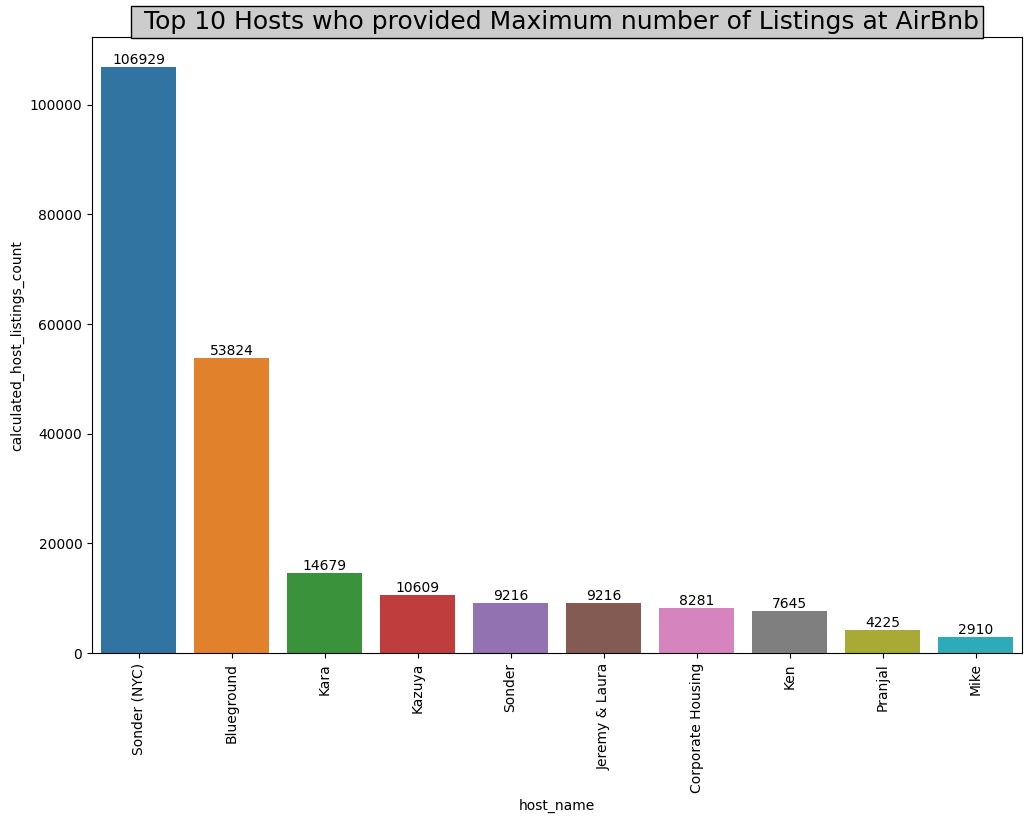

In [28]:
# Chart - 1 visualization code
host = df.groupby('host_name')['calculated_host_listings_count'].sum().reset_index().sort_values(by = 'calculated_host_listings_count',ascending = False).head(10)
plt.figure(figsize= (12,8))
ax = sns.barplot(x = host.host_name,y= host.calculated_host_listings_count)
plt.xticks(rotation  =90)
plt.title(' Top 10 Hosts who provided Maximum number of Listings at AirBnb',fontsize= 18,bbox={'facecolor':'0.8', 'pad':3})
for num in ax.containers:
  ax.bar_label(num)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Pie Chart

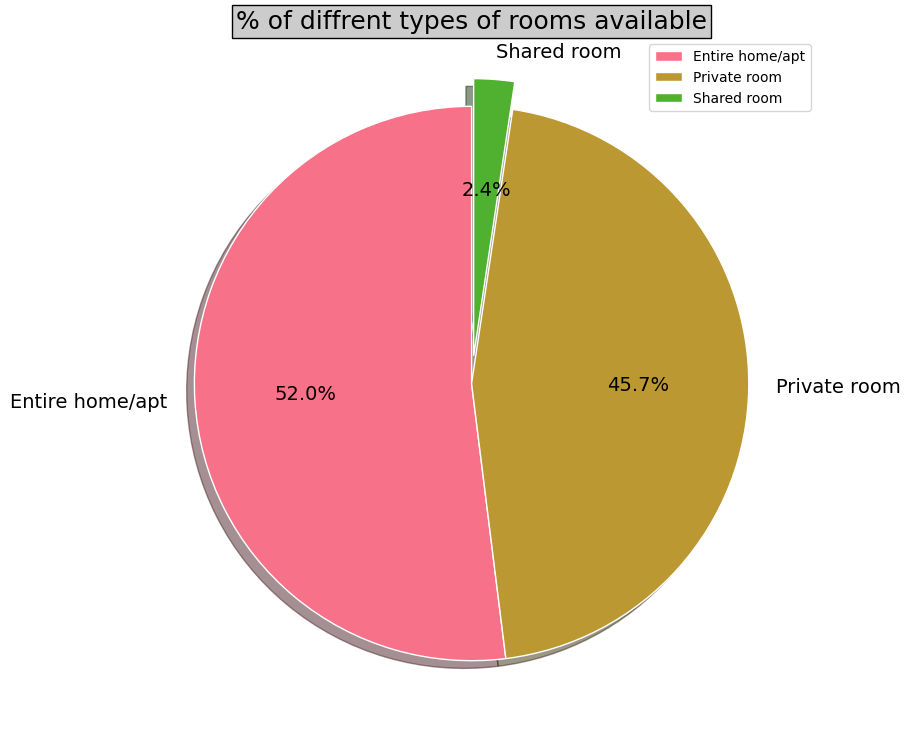

In [29]:
# Chart - 2 visualization code
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = 12,9
labels = df['room_type'].value_counts().index.tolist()      # Create labels -> ['Entire home/ apt','Private room','Shared room']
x = df['room_type'].value_counts().tolist()              # counts of each type of room -> [25393,22306,1159]
plt.title('% of diffrent types of rooms available',fontsize=18,bbox={'facecolor':'0.8', 'pad':3})
plt.pie(x,explode=(0,0,0.1), labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14},shadow=True,wedgeprops={'edgecolor': 'white'})
plt.legend(labels, loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Pie Chart

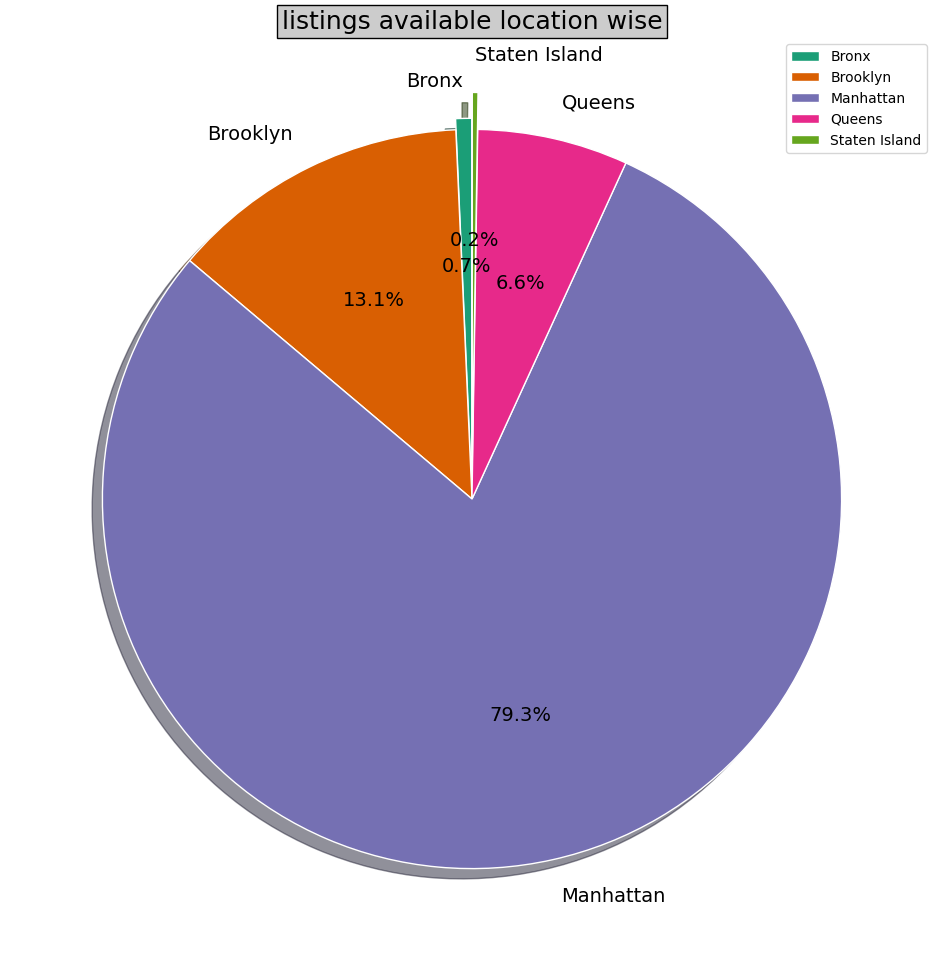

In [30]:
# Chart - 3 visualization code
state = df.groupby('location')['calculated_host_listings_count'].sum().reset_index()
plt.rcParams['figure.figsize'] = 12,12
sns.set_palette('Dark2')
plt.pie(state.calculated_host_listings_count,labels = state.location,explode = (0.03,0,0,0,0.1),textprops={'fontsize': 14}, startangle=90,autopct = '%0.1f%%',wedgeprops={'edgecolor': 'white'},shadow = True)
plt.legend(state.location, loc="best")
plt.title('listings available location wise',fontsize = 18,bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Scatter Plot

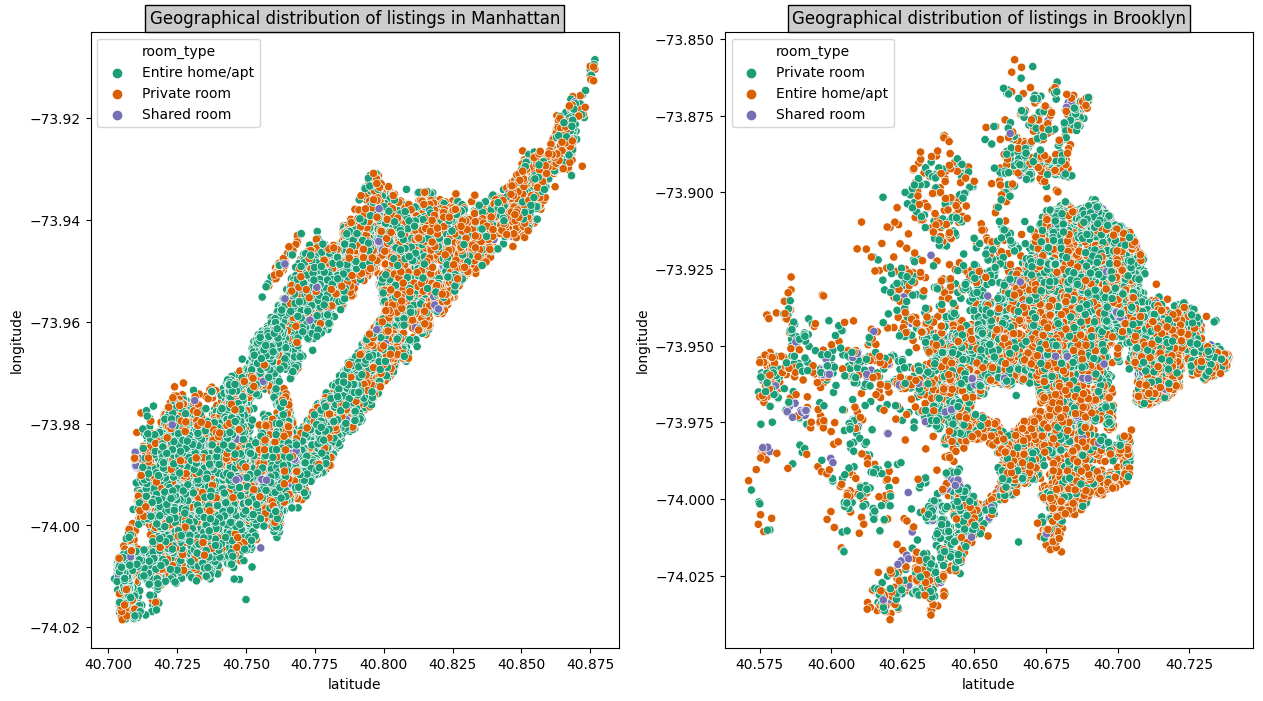

In [31]:
# Chart - 4 visualization code
# we will use scatterplot to see the  geographical distribution of rooms available in Manhattan and Brooklyn
area1 = df[df['location']=='Manhattan']
area2 = df[df['location']=='Brooklyn']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x=area1['latitude'],y=area1['longitude'],hue =area1['room_type'])
plt.title('Geographical distribution of listings in Manhattan',bbox={'facecolor':'0.8', 'pad':3})
plt.subplot(1,2,2)
sns.scatterplot(x=area2['latitude'],y=area2['longitude'],hue =area2['room_type'])
plt.title('Geographical distribution of listings in Brooklyn',bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Stacked Bar Plot

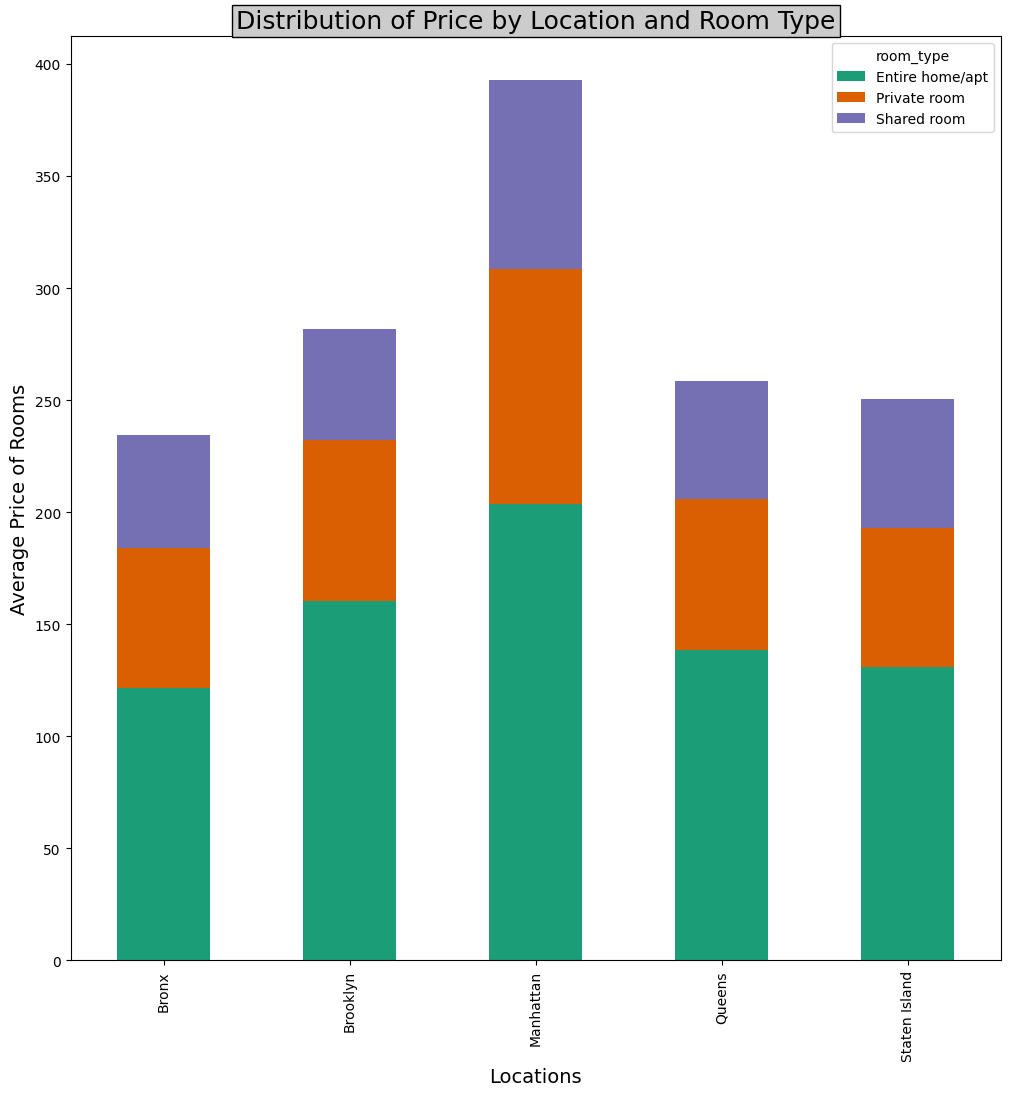

In [70]:
# Visualization code
grouped_data = df.groupby(['location', 'room_type'])['price'].mean().unstack()
grouped_data.plot(kind = 'bar',stacked = True)
plt.xlabel('Locations',fontsize = 14)
plt.ylabel('Average Price of Rooms',fontsize = 14)
plt.title('Distribution of Price by Location and Room Type',fontsize = 18,bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Bar plot

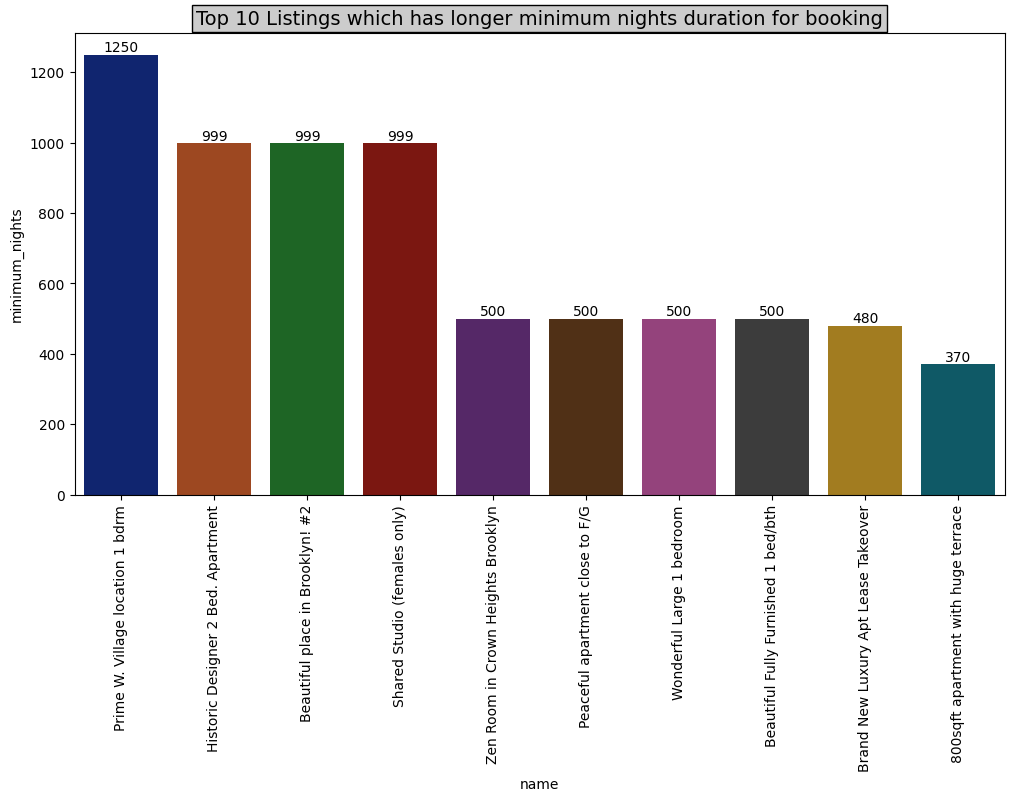

In [33]:
grp = df.groupby('name')['minimum_nights'].mean().reset_index().sort_values(by = 'minimum_nights',ascending = False).head(10)
plt.figure(figsize=(12,6))
bargraph = sns.barplot(x=grp.name,y= grp.minimum_nights,palette='dark')
plt.xticks(rotation = 90)
for label in bargraph.containers:
  bargraph.bar_label(label)
plt.title('Top 10 Listings which has longer minimum nights duration for booking',fontsize= 14,bbox={'facecolor':'0.8', 'pad':3})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Count plot

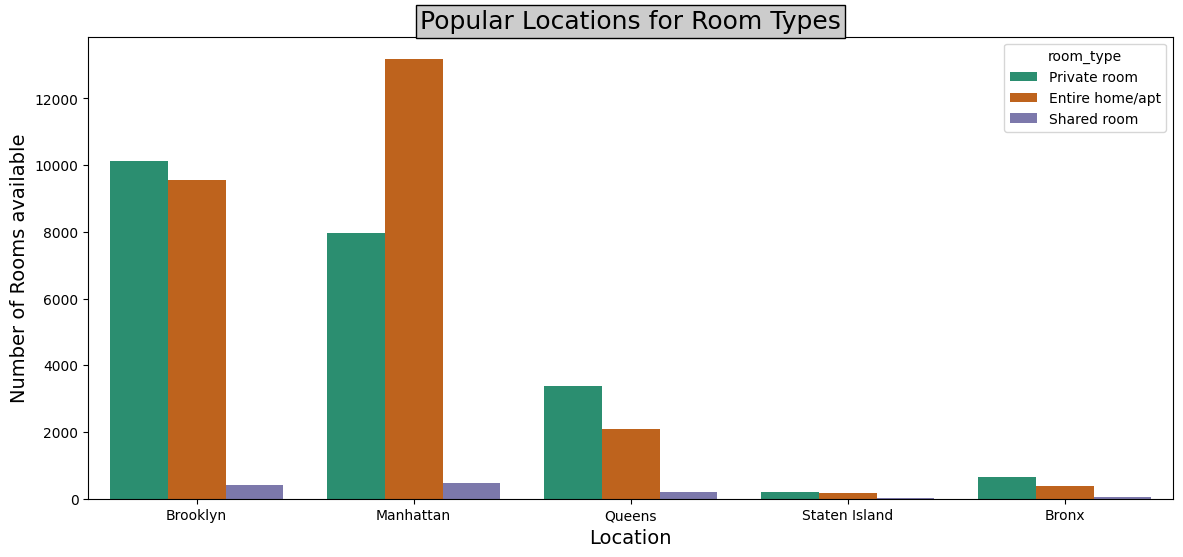

In [34]:
# Chart - 7 visualization code
plt.figure(figsize=(14,6))
sns.countplot(x='location', hue = 'room_type', data= df,palette= 'Dark2')
plt.title('Popular Locations for Room Types',fontsize = 18,bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('Location',fontsize = 14)
plt.ylabel('Number of Rooms available',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [44]:
df.head()

,id,name,host_id,host_name,location,area,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


#### Chart - 8 Scatter plot

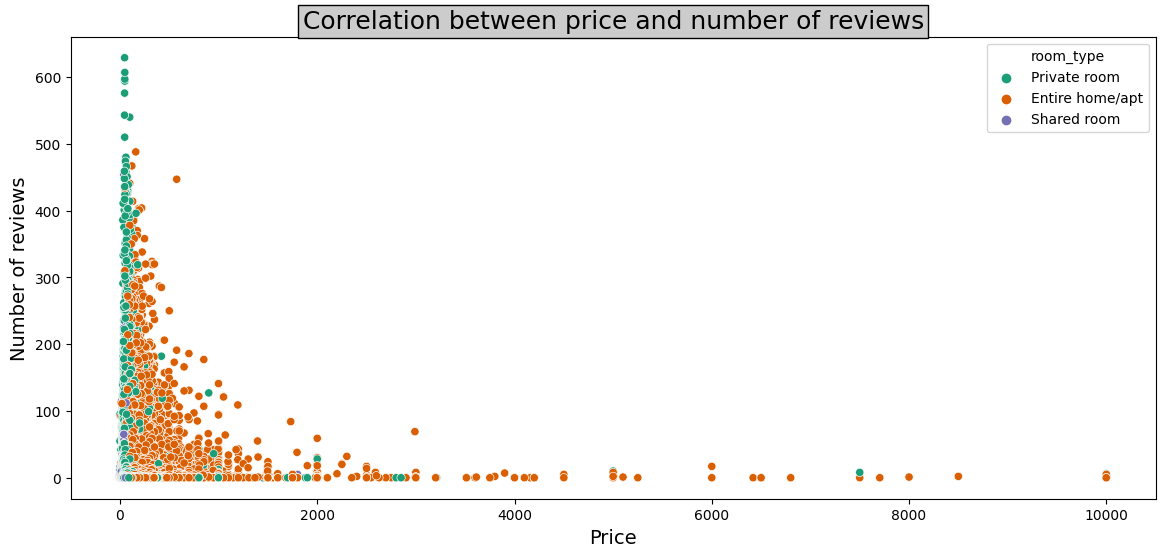

In [46]:
# Chart - 8 visualization code
plt.figure(figsize=(14,6))
sns.scatterplot(x=df['price'],y= df['number_of_reviews'],hue = df['room_type'])
plt.title('Correlation between price and number of reviews',fontsize = 18,bbox={'facecolor':'0.8', 'pad':3})
plt.xlabel('Price',fontsize = 14)
plt.ylabel('Number of reviews',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 box plot

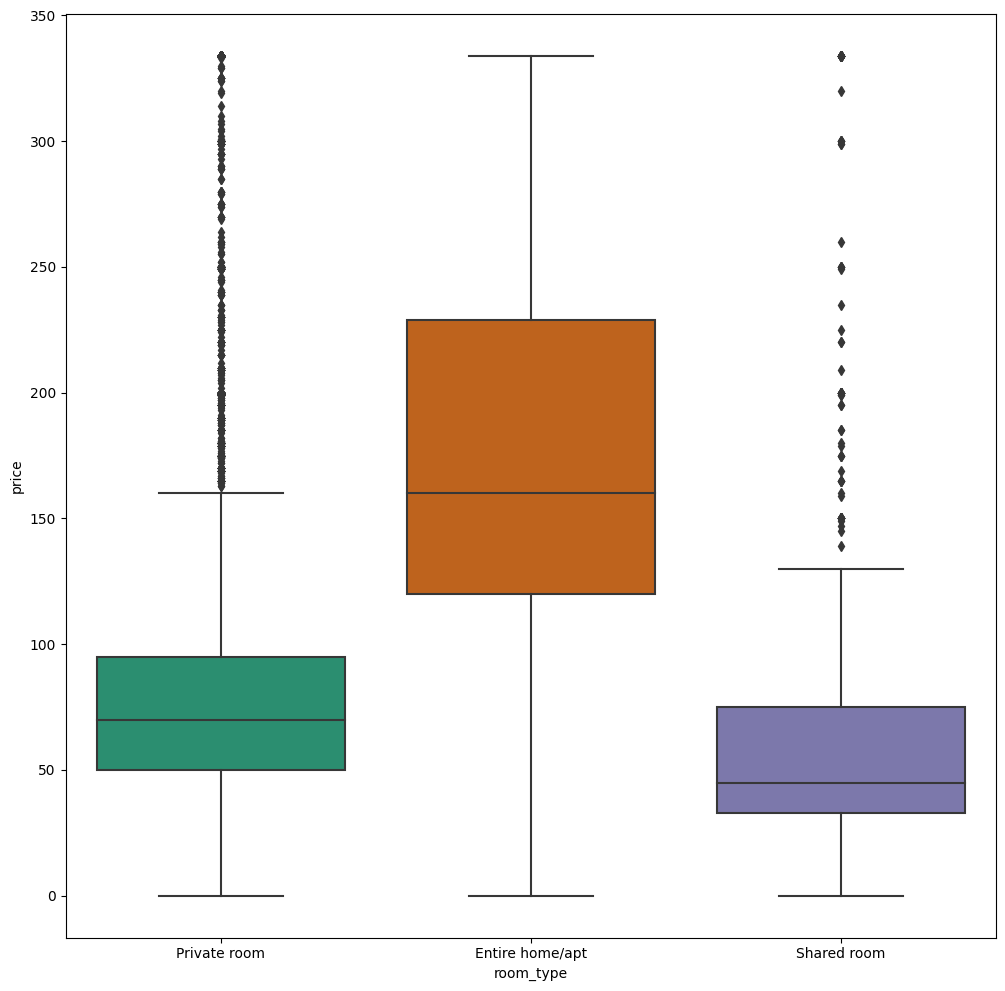

In [60]:
# Chart - 9 visualization code
sns.boxplot(x=df['room_type'],y=df['price'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [42]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***